In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

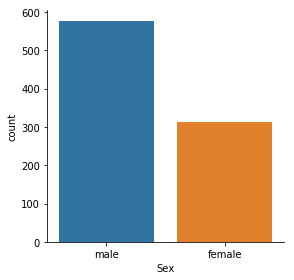

In [9]:
sns.factorplot('Sex',data=titanic_df,kind='count')

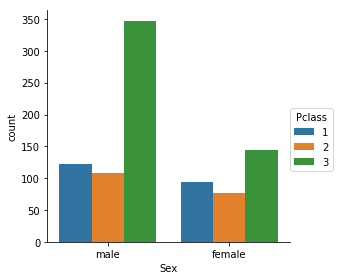

In [11]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

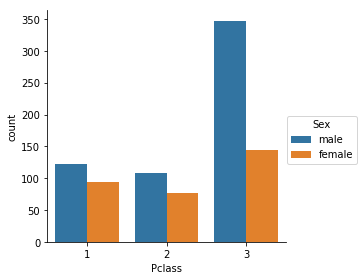

In [12]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [13]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [14]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [15]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


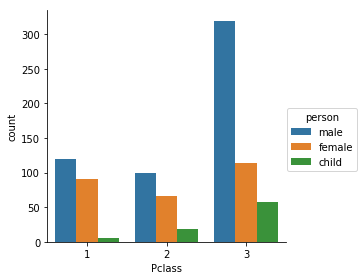

In [16]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

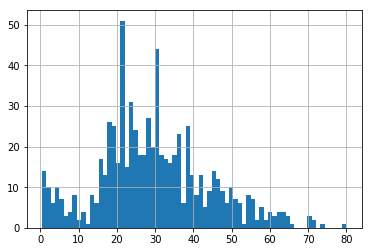

In [17]:
titanic_df['Age'].hist(bins=70)

In [18]:
titanic_df['Age'].mean()

29.69911764705882

In [19]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

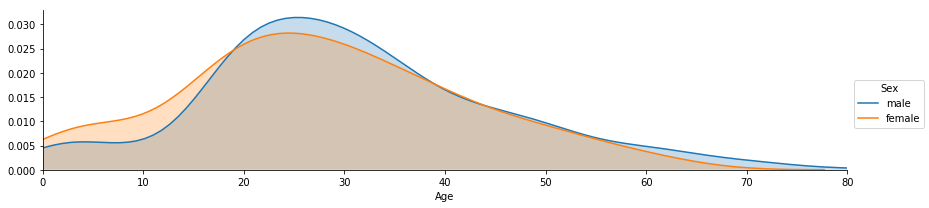

In [21]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

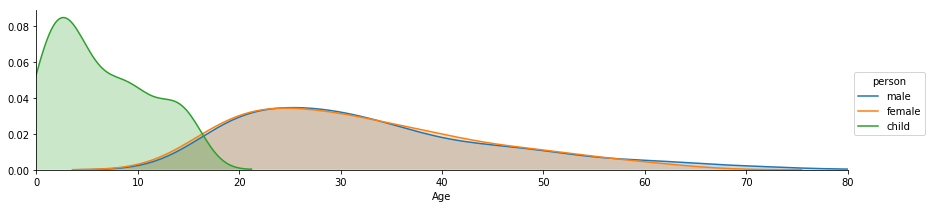

In [22]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

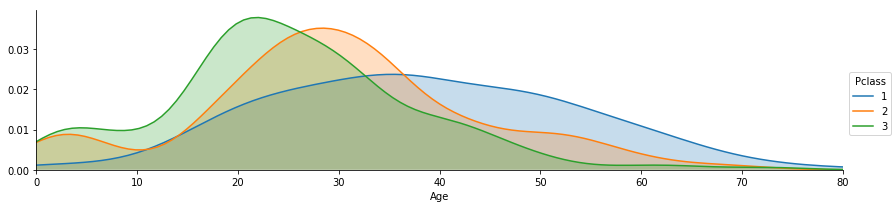

In [23]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [24]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
deck = titanic_df['Cabin'].dropna()

In [26]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

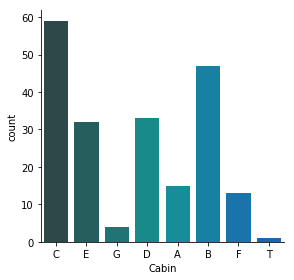

In [28]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels) 
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

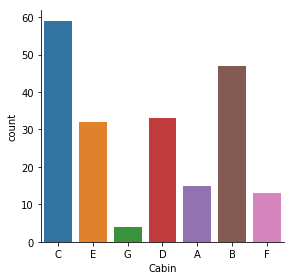

In [30]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,kind='count')

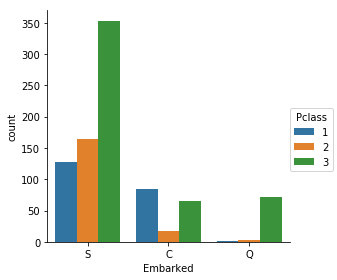

In [32]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

In [39]:
#alone or family?


In [40]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [42]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


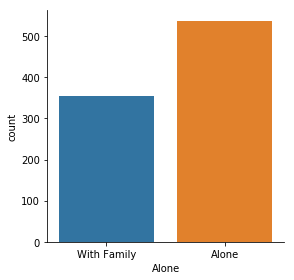

In [44]:
sns.factorplot('Alone',data=titanic_df,kind='count')

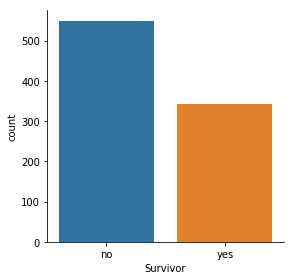

In [45]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data=titanic_df,kind='count')

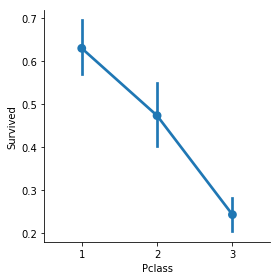

In [47]:
sns.factorplot('Pclass','Survived',data=titanic_df)

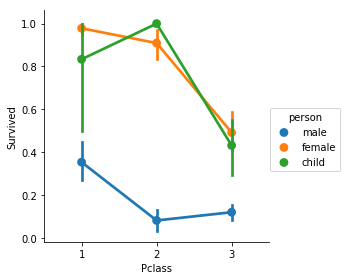

In [48]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

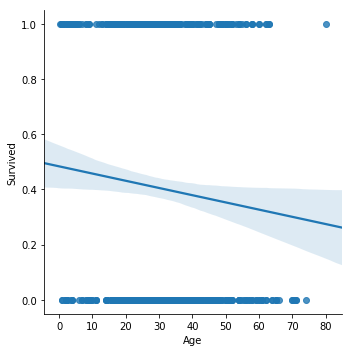

In [49]:
sns.lmplot('Age','Survived',data=titanic_df)

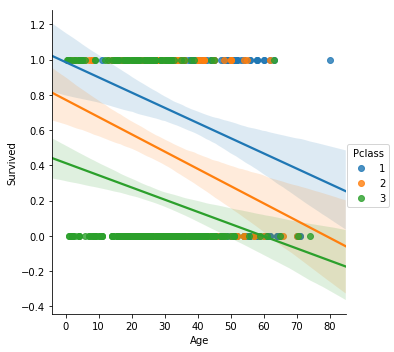

In [50]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

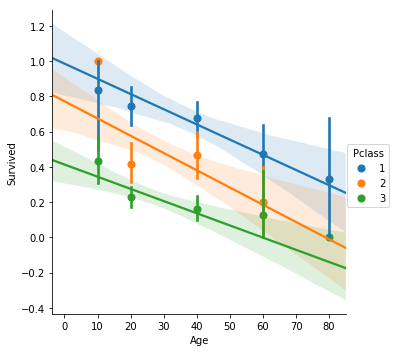

In [51]:
gen = [10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',x_bins=gen)

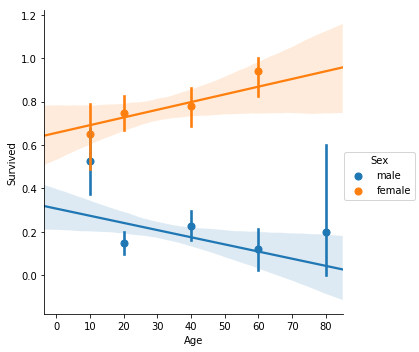

In [52]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=gen)

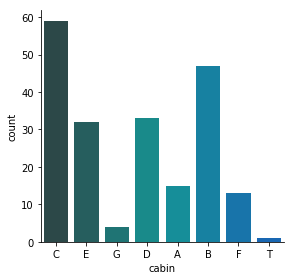

In [72]:
#sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=gen)
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels) 
cabin_df.columns = ['cabin']
sns.factorplot('cabin',data=cabin_df,palette='winter_d',kind='count')

In [73]:
cabin_df

,cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


In [74]:
result = pd.concat([titanic_df, cabin_df], axis=1, join_axes=[titanic_df.index])

In [75]:
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


In [76]:
result.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone,Survivor,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Alone,no,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,male,Alone,no,D
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male,Alone,no,A
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,With Family,no,C
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,female,With Family,yes,B
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child,With Family,yes,D


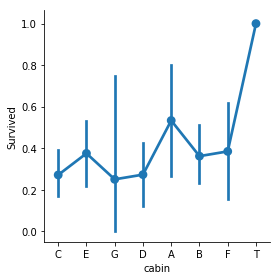

In [77]:
sns.factorplot('cabin','Survived',data=result)

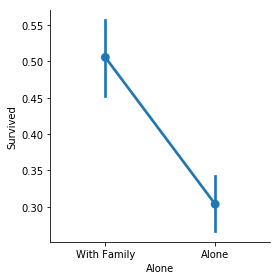

In [78]:
sns.factorplot('Alone','Survived',data=result)